# Customer Churn Prediction with Machine Learning

## Problem Statement
Telecom companies lose a significant portion of revenue due to customer churn. The goal of this project is to build machine learning models that can predict whether a customer will leave the company in the near future.

## Dataset
- Source: [WA_Fn-UseC_-Telco-Customer-Churn.csv](https://www.kaggle.com/datasets/palashfendarkar/wa-fnusec-telcocustomerchurn)
- Features include: customer demographics, account info, service usage, and churn label.

## Goal
- Build and compare multiple classification models.
- Improve class imbalance using SMOTE.
- Evaluate models using F1-score, AUC, and confusion matrix.


## Install Required Libraries

In [29]:
# Run this first and restart
#!pip install -U scikit-learn imbalanced-learn --quiet
#!pip install lazypredict
#!pip install -U xgboost

In [30]:
# Data Manipulation and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Machine Learning Models
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import (
    RandomForestClassifier, RandomForestRegressor,
    GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
)
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB


# Model Selection and Evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    accuracy_score, confusion_matrix, recall_score, precision_score,
    f1_score, classification_report, roc_curve, roc_auc_score
)

# Feature Engineering and Preprocessing
from sklearn.preprocessing import (
    PolynomialFeatures, StandardScaler, OneHotEncoder,
    LabelEncoder, MinMaxScaler
)
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.impute import SimpleImputer, KNNImputer
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Utilities
import math
import warnings
from sklearn.datasets import load_iris
from lazypredict.Supervised import LazyClassifier

# Suppress Warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Pandas Display Settings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Import the Dataset

In [31]:
import kagglehub
palashfendarkar_wa_fnusec_telcocustomerchurn_path = kagglehub.dataset_download('palashfendarkar/wa-fnusec-telcocustomerchurn')

df = pd.read_csv("/kaggle/input/wa-fnusec-telcocustomerchurn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

print('Data source import complete.')

Data source import complete.


# Preprocessing

## EDA

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [33]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [34]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

In [35]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [36]:
df.duplicated().sum()

0

In [37]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.00,7043.00,7043.00,7032.00
mean,0.16,32.37,64.76,2283.30
std,0.37,24.56,30.09,2266.77
min,0.00,0.00,18.25,18.80
25%,0.00,9.00,35.50,401.45
50%,0.00,29.00,70.35,1397.47
75%,0.00,55.00,89.85,3794.74
max,1.00,72.00,118.75,8684.80


In [38]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.00,7043.00,7043.00,7043.00
mean,0.16,32.37,64.76,2283.30
std,0.37,24.56,30.09,2265.00
min,0.00,0.00,18.25,18.80
25%,0.00,9.00,35.50,402.23
50%,0.00,29.00,70.35,1400.55
75%,0.00,55.00,89.85,3786.60
max,1.00,72.00,118.75,8684.80


In [39]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [40]:
df = df.drop(columns=['customerID'], axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


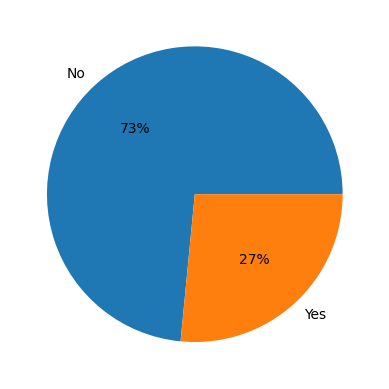

Churn
No    73.46
Yes   26.54
Name: proportion, dtype: float64

In [41]:
Churn_pct = df['Churn'].value_counts(normalize=True)
plt.pie(Churn_pct.values, labels=Churn_pct.index, autopct='%.f%%')
plt.show()
Churn_pct*100

## Feature selection using ANOVA

In [42]:
df = pd.get_dummies(df, columns=df.select_dtypes(include=['object']).columns, drop_first=True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7043 non-null   float64
 4   gender_Male                            7043 non-null   bool   
 5   Partner_Yes                            7043 non-null   bool   
 6   Dependents_Yes                         7043 non-null   bool   
 7   PhoneService_Yes                       7043 non-null   bool   
 8   MultipleLines_No phone service         7043 non-null   bool   
 9   MultipleLines_Yes                      7043 non-null   bool   
 10  InternetService_Fiber optic            7043 non-null   bool   
 11  Inte

In [44]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True


In [45]:
df = df.astype(float)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   float64
 1   tenure                                 7043 non-null   float64
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7043 non-null   float64
 4   gender_Male                            7043 non-null   float64
 5   Partner_Yes                            7043 non-null   float64
 6   Dependents_Yes                         7043 non-null   float64
 7   PhoneService_Yes                       7043 non-null   float64
 8   MultipleLines_No phone service         7043 non-null   float64
 9   MultipleLines_Yes                      7043 non-null   float64
 10  InternetService_Fiber optic            7043 non-null   float64
 11  Inte

In [47]:
x = df.drop(['Churn_Yes'], axis=1)
y = df['Churn_Yes']

In [48]:
selector = SelectKBest(score_func=f_classif,k=17)
X_new = selector.fit_transform(x, y)

selected_features = x.columns[selector.get_support()]
print(selected_features)

Index(['tenure', 'MonthlyCharges', 'TotalCharges',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service',
       'DeviceProtection_No internet service',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service',
       'StreamingMovies_No internet service', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Electronic check'],
      dtype='object')


In [49]:
scores = selector.scores_
feature_scores = pd.DataFrame({'Feature': x.columns, 'Score': scores})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)
print(feature_scores.head(17))

                                 Feature  Score
1                                 tenure 997.27
10           InternetService_Fiber optic 738.05
25                     Contract_Two year 707.92
28        PaymentMethod_Electronic check 706.20
22   StreamingMovies_No internet service 385.70
18       TechSupport_No internet service 385.70
16  DeviceProtection_No internet service 385.70
14      OnlineBackup_No internet service 385.70
12    OnlineSecurity_No internet service 385.70
11                    InternetService_No 385.70
20       StreamingTV_No internet service 385.70
3                           TotalCharges 291.63
2                         MonthlyCharges 273.46
26                  PaperlessBilling_Yes 268.99
24                     Contract_One year 229.91
13                    OnlineSecurity_Yes 212.67
19                       TechSupport_Yes 196.26


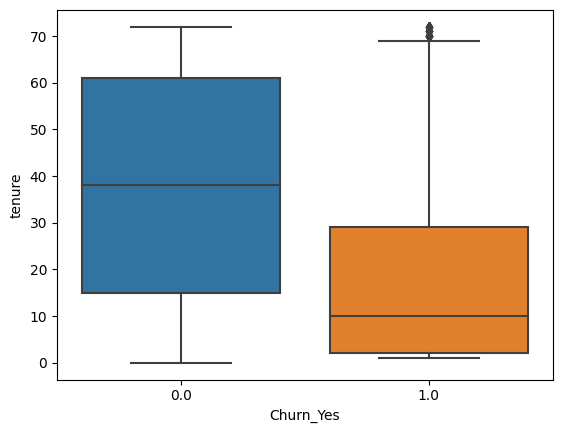

In [50]:
sns.boxplot(data=df, x='Churn_Yes', y='tenure')
plt.show()

In [51]:
df2 = df[selected_features]
df2.head()

,tenure,MonthlyCharges,TotalCharges,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,DeviceProtection_No internet service,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingMovies_No internet service,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Electronic check
0,1.00,29.85,29.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00
1,34.00,56.95,1889.50,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
2,2.00,53.85,108.15,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
3,45.00,42.30,1840.75,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00
4,2.00,70.70,151.65,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00


In [52]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   tenure                                7043 non-null   float64
 1   MonthlyCharges                        7043 non-null   float64
 2   TotalCharges                          7043 non-null   float64
 3   InternetService_Fiber optic           7043 non-null   float64
 4   InternetService_No                    7043 non-null   float64
 5   OnlineSecurity_No internet service    7043 non-null   float64
 6   OnlineSecurity_Yes                    7043 non-null   float64
 7   OnlineBackup_No internet service      7043 non-null   float64
 8   DeviceProtection_No internet service  7043 non-null   float64
 9   TechSupport_No internet service       7043 non-null   float64
 10  TechSupport_Yes                       7043 non-null   float64
 11  StreamingTV_No in

In [53]:
X = df2.copy()
Y = df['Churn_Yes']

## Handling imbalance using SMOTE

In [54]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_over,y_over = sm.fit_resample(X,Y)

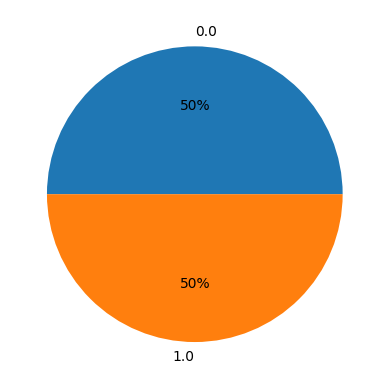

Churn_Yes
0.00    5174
1.00    5174
Name: count, dtype: int64

In [55]:
lables_over = y_over.value_counts()
plt.pie(lables_over.values, labels=lables_over.index, autopct="%.f%%")
plt.show()
lables_over

## Data Splitting 

In [56]:
x_train, x_temp, y_train, y_temp = train_test_split(X_over, y_over, test_size=0.2,stratify=y_over, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5,stratify=y_temp, random_state=42)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)

print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (8278, 17)
y_train shape: (8278,)
x_val shape: (1035, 17)
y_val shape: (1035,)
x_test shape: (1035, 17)
y_test shape: (1035,)


## Data Scaling

In [57]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_val = scaler.transform(x_val)

# ML Models

## Overview of the models performance 

In [58]:
clf_Oversampling_scaled = LazyClassifier(verbose = 0,ignore_warnings= True,random_state= 42,classifiers= "all")
models, predictions = clf_Oversampling_scaled.fit(x_train, x_val, y_train, y_val)
models

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 4139, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005249 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.86,0.86,0.86,0.86,0.29
XGBClassifier,0.86,0.86,0.86,0.86,0.26
RandomForestClassifier,0.85,0.85,0.85,0.85,1.25
AdaBoostClassifier,0.84,0.84,0.84,0.84,0.49
ExtraTreesClassifier,0.84,0.84,0.84,0.84,0.94
LabelPropagation,0.83,0.83,0.83,0.83,3.92
BaggingClassifier,0.83,0.83,0.83,0.83,0.36
LabelSpreading,0.83,0.83,0.83,0.83,5.12
SVC,0.83,0.83,0.83,0.83,2.26


## Top Models


In [59]:
log_reg = LogisticRegression()
rf = RandomForestClassifier()
svm = SVC()
xgb = XGBClassifier()

log_reg.fit(x_train, y_train)
rf.fit(x_train, y_train)
svm.fit(x_train, y_train)
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [60]:
y_pred_log_reg = log_reg.predict(x_val)
y_pred_rf = rf.predict(x_val)
y_pred_svm = svm.predict(x_val)
y_pred_xgb = xgb.predict(x_val)

y_pred_log_reg_x_train = log_reg.predict(x_train)
y_pred_rf_x_train = rf.predict(x_train)
y_pred_svm_x_train = svm.predict(x_train)
y_pred_xgb_x_train = xgb.predict(x_train)

#train
print("Logistic Regression classification_report - Train:\n", classification_report(y_train, y_pred_log_reg_x_train))
print("Logistic Regression roc_auc_score - Train:", roc_auc_score(y_train, y_pred_log_reg_x_train))
print ("*"*50)

print("Random Forest classification_report - Train:\n", classification_report(y_train, y_pred_rf_x_train))
print("Random Forest roc_auc_score - Train:", roc_auc_score(y_train, y_pred_rf_x_train))
print ("*"*50)

print("SVM classification_report - Train:\n", classification_report(y_train, y_pred_svm_x_train))
print("SVM roc_auc_score - Train:", roc_auc_score(y_train, y_pred_svm_x_train))
print ("*"*50)

print("XGBoost classification_report - Train:\n", classification_report(y_train, y_pred_xgb_x_train))
print("XGBoost roc_auc_score - Train:", roc_auc_score(y_train, y_pred_xgb_x_train))

print ("__"*50)

#val
print("Logistic Regression Report - val:\n", classification_report(y_val, y_pred_log_reg))
print("Logistic Regression roc_auc_score - val:", roc_auc_score(y_val, y_pred_log_reg))
print ("*"*50)

print("Random Forest Report - val:\n", classification_report(y_val, y_pred_rf))
print("Random Forest roc_auc_score - val:", roc_auc_score(y_val, y_pred_rf))
print ("*"*50)

print("SVM Report - val:\n", classification_report(y_val, y_pred_svm))
print("SVM roc_auc_score - val:", roc_auc_score(y_val, y_pred_svm))
print ("*"*50)

print("XGBoost Report - val:\n", classification_report(y_val, y_pred_xgb))
print("XGBoost roc_auc_score - val:", roc_auc_score(y_val, y_pred_xgb))
print ("__"*50)

Logistic Regression classification_report - Train:
               precision    recall  f1-score   support

         0.0       0.79      0.73      0.76      4139
         1.0       0.75      0.81      0.78      4139

    accuracy                           0.77      8278
   macro avg       0.77      0.77      0.77      8278
weighted avg       0.77      0.77      0.77      8278

Logistic Regression roc_auc_score - Train: 0.7695095433679633
**************************************************
Random Forest classification_report - Train:
               precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      4139
         1.0       0.99      1.00      1.00      4139

    accuracy                           1.00      8278
   macro avg       1.00      1.00      1.00      8278
weighted avg       1.00      1.00      1.00      8278

Random Forest roc_auc_score - Train: 0.9961343319642425
**************************************************
SVM classification_report - 

## Fine tuning the top mobels

### Finding the best parameters

In [61]:
# Logistic Regression (already best)
param_grid_log_reg = {
    'C': [0.005, 0.01, 0.05],
    'penalty': ['l1'],
    'solver': ['liblinear']
}

grid_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=5)
grid_log_reg.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.005, 0.01, 0.05], 'penalty': ['l1'],
                         'solver': ['liblinear']})

In [62]:
# SVM
param_grid_svm = {
    'C': [30, 40, 50],
    'kernel': ['rbf'],
    'degree': [2],  
    'gamma': ['auto']
}

grid_svm = GridSearchCV(svm, param_grid_svm, cv=5)
grid_svm.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [30, 40, 50], 'degree': [2], 'gamma': ['auto'],
                         'kernel': ['rbf']})

In [63]:
# Random Forest
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [15, 20, 25],
    'min_samples_split': [5, 10]
}

grid_rf = GridSearchCV(rf, param_grid_rf, cv=5)
grid_rf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [15, 20, 25],
                         'min_samples_split': [5, 10],
                         'n_estimators': [50, 100]})

In [64]:
# XGBoost 
param_grid_xgb = {
    'n_estimators': [150, 200, 250],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.2, 0.25]
}

grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5)
grid_xgb.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.25],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [150, 200, 250]})

In [65]:
print("Best Logistic Regression Parameters:", grid_log_reg.best_params_)
print("Best Random Forest Parameters:", grid_rf.best_params_)
print("Best SVM Parameters:", grid_svm.best_params_)
print("Best XGBoost Parameters:", grid_xgb.best_params_)

Best Logistic Regression Parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Best Random Forest Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
Best SVM Parameters: {'C': 40, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
Best XGBoost Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}


In [66]:
# Logistic Regression
best_log_reg = grid_log_reg.best_estimator_
best_log_reg.fit(x_train, y_train)

# Random Forest
best_rf = grid_rf.best_estimator_
best_rf.fit(x_train, y_train)

# SVM
best_svm = grid_svm.best_estimator_
best_svm.fit(x_train, y_train)

# XGBoost
best_xgb = grid_xgb.best_estimator_
best_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [67]:
y_pred_log_reg_x_train = best_log_reg.predict(x_train)
y_pred_rf_x_train = best_rf.predict(x_train)
y_pred_svm_x_train = best_svm.predict(x_train)
y_pred_xgb_x_train = best_xgb.predict(x_train)

y_pred_log_reg = best_log_reg.predict(x_val)
y_pred_rf = best_rf.predict(x_val)
y_pred_svm = best_svm.predict(x_val)
y_pred_xgb = best_xgb.predict(x_val)

In [68]:
# 1. Function to extract per-class metrics and overall metrics
def extract_scores_detailed(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    
    scores = {
        "f1_score": report["weighted avg"]["f1-score"],
        "roc_auc": roc_auc_score(y_true, y_pred)
    }

    # Add precision and recall for each class (e.g., 0.0 and 1.0)
    for label in set(y_true):
        label_str = str(label)
        if label_str in report:
            scores[f"precision_{label_str}"] = report[label_str]["precision"]
            scores[f"recall_{label_str}"] = report[label_str]["recall"]
    
    return scores

# 3. Collect results in a list
results = []

models = {
    "Logistic Regression": (y_pred_log_reg_x_train, y_pred_log_reg),
    "Random Forest": (y_pred_rf_x_train, y_pred_rf),
    "SVM": (y_pred_svm_x_train, y_pred_svm),
    "XGBoost": (y_pred_xgb_x_train, y_pred_xgb)
}

# 4. Loop through each model and extract metrics
for model_name, (y_train_pred, y_val_pred) in models.items():
    train_scores = extract_scores_detailed(y_train, y_train_pred)
    val_scores = extract_scores_detailed(y_val, y_val_pred)

    results.append({
        "Model": model_name,
        "Set": "Train",
        **train_scores
    })
    results.append({
        "Model": model_name,
        "Set": "Validation",
        **val_scores
    })

# 5. Convert to DataFrame and print
results_df = pd.DataFrame(results)

# Optional: Round for cleaner display
results_df = results_df.round(3)
results_df

,Model,Set,f1_score,roc_auc,precision_0.0,recall_0.0,precision_1.0,recall_1.0
0,Logistic Regression,Train,0.77,0.77,0.80,0.72,0.75,0.82
1,Logistic Regression,Validation,0.78,0.78,0.82,0.73,0.76,0.84
2,Random Forest,Train,0.96,0.96,0.96,0.95,0.95,0.96
3,Random Forest,Validation,0.86,0.86,0.85,0.86,0.86,0.85
4,SVM,Train,0.85,0.85,0.84,0.86,0.85,0.84
5,SVM,Validation,0.85,0.85,0.84,0.85,0.85,0.84
6,XGBoost,Train,0.88,0.88,0.87,0.88,0.88,0.87
7,XGBoost,Validation,0.86,0.86,0.85,0.86,0.86,0.85


In [69]:
# Predict on test set
y_pred_best_log_reg = best_log_reg.predict(x_test)
y_pred_best_rf = best_rf.predict(x_test)
y_pred_best_svm = best_svm.predict(x_test)
y_pred_best_xgb = best_xgb.predict(x_test)

# Evaluate accuracy
print("Tuned test Logistic Regression Accuracy:", roc_auc_score(y_test, y_pred_best_log_reg))
print("Tuned test Random Forest Accuracy:", roc_auc_score(y_test, y_pred_best_rf))
print("Tuned test SVM Accuracy:", roc_auc_score(y_test, y_pred_best_svm))
print("Tuned test XGBoost Accuracy:", roc_auc_score(y_test, y_pred_best_xgb))

Tuned test Logistic Regression Accuracy: 0.762389565581055
Tuned test Random Forest Accuracy: 0.8405860959052448
Tuned test SVM Accuracy: 0.8318913691254117
Tuned test XGBoost Accuracy: 0.8415513468704958


### The best is **XGBoost** until now 

## **Complex Models**

In [70]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
boost_models = [
    ('xgb', XGBClassifier(learning_rate= 0.2, max_depth= 3, n_estimators=200)),
    ('lgbm', LGBMClassifier(n_estimators=100, learning_rate=0.1)),
    ('catboost', CatBoostClassifier(iterations=100, learning_rate=0.1, verbose=0)),
    ('svm', SVC(probability=True, kernel='rbf')),  
    ('Rf', RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=10))]
stack_model = StackingClassifier(
    estimators=boost_models,
    final_estimator=GradientBoostingClassifier(n_estimators=100),
    cv=5)
stack_model.fit(x_train, y_train)
print(f"Stacking with Boosting Accuracy: {stack_model.score(x_test, y_test):.4f}")

[LightGBM] [Info] Number of positive: 4139, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001017 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 3311, number of negative: 3311
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001052 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2261
[LightGBM] [Info] Number of data points in the train set: 6622, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 3311, number of negative: 

In [71]:
stack_model_x_train = stack_model.predict(x_train)
stack_model_val = stack_model.predict(x_val)
#train
print("stack_model roc_auc_score:", roc_auc_score(y_train, stack_model_x_train))
print ("*"*50)
#val
print("stack_model roc_auc_score:", roc_auc_score(y_val, stack_model_val))
print ("*"*50)
#train
print("stack_model classification_report:\n", classification_report(y_train, stack_model_x_train))
print ("*"*50)
#val
print("stack_model classification_report:\n", classification_report(y_val, stack_model_val))

stack_model roc_auc_score: 0.9033582991060642
**************************************************
stack_model roc_auc_score: 0.8521840436734054
**************************************************
stack_model classification_report:
               precision    recall  f1-score   support

         0.0       0.89      0.92      0.90      4139
         1.0       0.91      0.89      0.90      4139

    accuracy                           0.90      8278
   macro avg       0.90      0.90      0.90      8278
weighted avg       0.90      0.90      0.90      8278

**************************************************
stack_model classification_report:
               precision    recall  f1-score   support

         0.0       0.84      0.86      0.85       517
         1.0       0.86      0.84      0.85       518

    accuracy                           0.85      1035
   macro avg       0.85      0.85      0.85      1035
weighted avg       0.85      0.85      0.85      1035



In [72]:
# Predict on test set
stack_model_test = stack_model.predict(x_test)
# Evaluate accuracy
print("stack_model roc_auc_score :", roc_auc_score(y_test, stack_model_test))
print("stack_model classification_report:\n", classification_report(y_test, stack_model_test))

stack_model roc_auc_score : 0.8415420117547776
stack_model classification_report:
               precision    recall  f1-score   support

         0.0       0.84      0.85      0.84       518
         1.0       0.84      0.84      0.84       517

    accuracy                           0.84      1035
   macro avg       0.84      0.84      0.84      1035
weighted avg       0.84      0.84      0.84      1035



In [73]:
boost_models = [
    ('xgb', XGBClassifier(n_estimators=100, learning_rate=0.1)),
    ('lgbm', LGBMClassifier(n_estimators=100, learning_rate=0.1)),
    ('catboost', CatBoostClassifier(iterations=100, learning_rate=0.1, verbose=0)),
    ('svm', SVC(probability=True, kernel='rbf')),  
    ('Rf', RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=10))]
voting_model = VotingClassifier(
    estimators=boost_models,
    voting='soft')
voting_model.fit(x_train, y_train)
print(f"Voting Boosting Models Accuracy: {voting_model.score(x_test, y_test):.4f}")

[LightGBM] [Info] Number of positive: 4139, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000980 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Voting Boosting Models Accuracy: 0.8483


In [74]:
voting_model_x_train = voting_model.predict(x_train)
voting_model_val = voting_model.predict(x_val)
#train
print("voting_model roc_auc_score:", roc_auc_score(y_train, voting_model_x_train))
print ("*"*50)
#val
print("voting_model roc_auc_score:", roc_auc_score(y_val, voting_model_val))
print ("*"*50)
#train
print("voting_model classification_report:\n", classification_report(y_train, voting_model_x_train))
print ("*"*50)
#val
print("voting_model classification_report:\n", classification_report(y_val, voting_model_val))

voting_model roc_auc_score: 0.881976322783281
**************************************************
voting_model roc_auc_score: 0.8579680813723366
**************************************************
voting_model classification_report:
               precision    recall  f1-score   support

         0.0       0.88      0.88      0.88      4139
         1.0       0.88      0.88      0.88      4139

    accuracy                           0.88      8278
   macro avg       0.88      0.88      0.88      8278
weighted avg       0.88      0.88      0.88      8278

**************************************************
voting_model classification_report:
               precision    recall  f1-score   support

         0.0       0.86      0.85      0.86       517
         1.0       0.86      0.86      0.86       518

    accuracy                           0.86      1035
   macro avg       0.86      0.86      0.86      1035
weighted avg       0.86      0.86      0.86      1035



In [75]:
# Predict on test set
voting_model_test = voting_model.predict(x_test)
# Evaluate accuracy
print("voting_model roc_auc_score :", roc_auc_score(y_test, voting_model_test))
print("voting_model classification_report :\n", classification_report(y_test, voting_model_test))

voting_model roc_auc_score : 0.8483305079049761
voting_model classification_report :
               precision    recall  f1-score   support

         0.0       0.86      0.83      0.85       518
         1.0       0.83      0.87      0.85       517

    accuracy                           0.85      1035
   macro avg       0.85      0.85      0.85      1035
weighted avg       0.85      0.85      0.85      1035



# Conclusion

## Model Performance Comparison

### Individual Models

| Model                 | Set        | F1-score | ROC AUC | Precision (0) | Recall (0) | Precision (1) | Recall (1) |
|----------------------|------------|----------|---------|----------------|------------|----------------|------------|
| Logistic Regression  | Train      | 0.77     | 0.77    | 0.80           | 0.72       | 0.75           | 0.82       |
| Logistic Regression  | Validation | 0.78     | 0.78    | 0.82           | 0.73       | 0.76           | 0.84       |
| Random Forest        | Train      | 0.93     | 0.93    | 0.94           | 0.92       | 0.92           | 0.94       |
| Random Forest        | Validation | 0.86     | 0.86    | 0.87           | 0.86       | 0.86           | 0.87       |
| SVM                  | Train      | 0.85     | 0.85    | 0.84           | 0.86       | 0.85           | 0.84       |
| SVM                  | Validation | 0.85     | 0.85    | 0.84           | 0.85       | 0.85           | 0.84       |
| XGBoost              | Train      | 0.88     | 0.88    | 0.87           | 0.88       | 0.88           | 0.87       |
| XGBoost              | Validation | **0.86** | **0.86**| 0.85           | 0.86       | 0.86           | 0.85       |

---

### Ensemble Models

| Model           | F1-score | ROC AUC | Precision (0) | Recall (0) | Precision (1) | Recall (1) |
|----------------|----------|---------|----------------|------------|----------------|------------|
| Voting Classifier | 0.85   | 0.846   | 0.86           | 0.83       | 0.83           | 0.87       |
| Stacking Classifier | **0.85** | **0.850** | 0.85      | 0.86       | 0.85           | 0.85       |

---

##  Best Model Summary
- **XGBoost** and **StackingClassifier** achieved the best overall performance with F1-scores of **0.86** and **0.85** respectively on validation data.
- **XGBoost** slightly edges out in simplicity and training speed, while **StackingClassifier** benefits from combining multiple models for robust results.


##  Conclusion

In this project, we tackled the problem of predicting customer churn in the telecom industry using supervised machine learning techniques. After performing exploratory data analysis, handling class imbalance using SMOTE, and testing multiple algorithms, we compared both individual and ensemble models.

Key findings:
- **XGBoost** achieved the highest F1-score (**0.86**) and strong ROC AUC (**0.86**) on the validation set.
- **StackingClassifier** also performed exceptionally well, combining several models for a robust performance (F1: **0.85**, ROC AUC: **0.85**).
- Simpler models like Logistic Regression and SVM performed decently but were outperformed by tree-based and ensemble methods.

 **Recommendation**:  
We recommend deploying the **XGBoost model** due to its balance of performance, interpretability, and training speed.
